In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



In [76]:
df=pd.read_csv("dataset.csv")

In [78]:
df.head()

,HoursStudied,PreviousScores,SleepHours,SampleQuestionPapersPracticed,percentage
0,7.0,99,9,1,91
1,4.0,82,4,2,65
2,8.0,51,7,2,45
3,5.0,52,5,2,36
4,7.0,75,8,5,66


In [80]:
df.isnull()

,HoursStudied,PreviousScores,SleepHours,SampleQuestionPapersPracticed,percentage
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,True,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [82]:
df.isnull().sum()

HoursStudied                     1
PreviousScores                   0
SleepHours                       0
SampleQuestionPapersPracticed    0
percentage                       0
dtype: int64

In [84]:
df.HoursStudied.median()

7.0

In [86]:
import math
x=math.floor(df.HoursStudied.median())

In [88]:
df.HoursStudied=df.HoursStudied.fillna(x)
df

,HoursStudied,PreviousScores,SleepHours,SampleQuestionPapersPracticed,percentage
0,7.0,99,9,1,91
1,4.0,82,4,2,65
2,8.0,51,7,2,45
3,5.0,52,5,2,36
4,7.0,75,8,5,66
5,7.0,78,9,6,61
6,7.0,73,5,6,63
7,8.0,45,4,6,42
8,5.0,77,8,2,61
9,4.0,89,4,0,69


In [90]:
df.dropna()

,HoursStudied,PreviousScores,SleepHours,SampleQuestionPapersPracticed,percentage
0,7.0,99,9,1,91
1,4.0,82,4,2,65
2,8.0,51,7,2,45
3,5.0,52,5,2,36
4,7.0,75,8,5,66
5,7.0,78,9,6,61
6,7.0,73,5,6,63
7,8.0,45,4,6,42
8,5.0,77,8,2,61
9,4.0,89,4,0,69


In [92]:
df.isnull().sum()

HoursStudied                     0
PreviousScores                   0
SleepHours                       0
SampleQuestionPapersPracticed    0
percentage                       0
dtype: int64

In [99]:
lr=LinearRegression()


In [101]:
lr.fit(df[["HoursStudied", "PreviousScores","SleepHours", "SampleQuestionPapersPracticed"]], df["percentage"])

LinearRegression()

In [103]:
lr.coef_

array([ 3.24735189,  0.96842599, -0.224867  , -0.38711138])

In [105]:
lr.intercept_

-27.45963325528404

In [107]:
df

,HoursStudied,PreviousScores,SleepHours,SampleQuestionPapersPracticed,percentage
0,7.0,99,9,1,91
1,4.0,82,4,2,65
2,8.0,51,7,2,45
3,5.0,52,5,2,36
4,7.0,75,8,5,66
5,7.0,78,9,6,61
6,7.0,73,5,6,63
7,8.0,45,4,6,42
8,5.0,77,8,2,61
9,4.0,89,4,0,69


In [109]:
3.24735189*5+0.96842599*78+-0.224867*13+-0.38711138*5+-27.45963325528404


59.455525514715966

In [113]:
y_pred = lr.predict(df[["HoursStudied", "PreviousScores", "SleepHours", "SampleQuestionPapersPracticed"]])

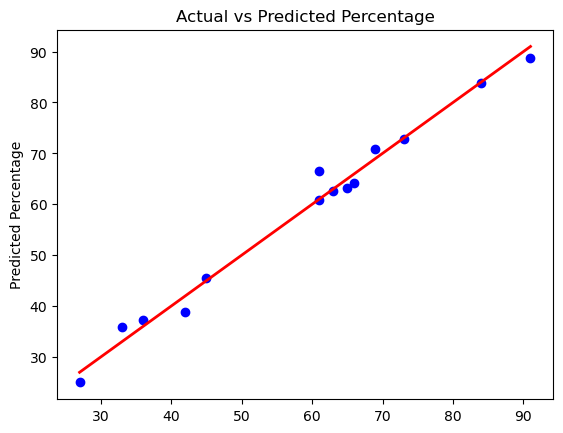

In [115]:
# Plot actual vs predicted values
plt.scatter(df["percentage"], y_pred, color='blue') 
plt.plot([df["percentage"].min(), df["percentage"].max()], [df["percentage"].min(), df["percentage"].max()], color='red', lw=2)  
plt.ylabel("Predicted Percentage")
plt.title("Actual vs Predicted Percentage")
plt.show()


In [124]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
r2=r2_score(df["percentage"],y_pred)
print(r2)

0.9855521996395835


In [126]:
MSE=mean_squared_error(df["percentage"],y_pred)
MSE

4.913136681747326

In [128]:
MAE=mean_absolute_error(df["percentage"],y_pred)

In [130]:
MAE

1.706707205362781